# Foundations of AI & ML
## Session 08
### Experiment 3-Part-1 

### Hyper parameters  

A hyperparameter is a parameter whose value is set before the learning process begins.

In this experiment we are going to tune the hyper parameters of MLPClassifier using MNIST dataset.

**Importing the required packages**


In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [2]:
#Load MNIST datset 
digits = datasets.load_digits(n_class=10)
# Create our X and y data
data = digits.data
target = digits.target

**Exercise 1 ** Split the data into train,test and validation sets.

In [3]:
X_train, X_test, X_validation = np.split(data, [int(.6 * len(data)), int(.8 * len(data))])
Y_train, Y_test, Y_validation = np.split(target, [int(.6 * len(target)), int(.8 * len(target))])
print(X_train.shape, X_test.shape, X_validation.shape)

(1078, 64) (359, 64) (360, 64)


In [5]:
#function to Create MLP classifier object with hyper parameters
def mlp(a,s,h,lr):
    clf = MLPClassifier(activation=a, solver=s, hidden_layer_sizes=h, max_iter=5000, learning_rate='constant', learning_rate_init=lr)
    return clf 

#function to calculate the accuracy
def accuracy(actual, predicted):
    return np.count_nonzero(actual == predicted)*1.0/len(actual)

In [6]:
### hyper parameters
# activation
a = ["identity", "logistic", "tanh", "relu"]
#solvers
s = ["lbfgs", "sgd", "adam"]
#learning rate
lr = [0.0001, 0.001, 0.01, 0.1]
#hidden layers
h = [(5, 2), (3, 2), (6, 3), (7, 2)]

** Exercise 2 ** Calculate test and validation accuracy

In [7]:
test_accuracy = []
validation_accuracy = []
train_accuracy = []
for i in range(10):
    k1 = np.random.randint(0, len(a))
    k2 = np.random.randint(0, len(s))
    k3 = np.random.randint(0, len(lr))
    k4 = np.random.randint(0, len(h))
    print("\nHyper-parameters = \n activation = ", a[k1],    "\n solver = ", s[k2], "\n learning_rate_init = ", lr[k3],         "\n hidden_layer_sizes = ", h[k4])
    #calling the mlp function with random hyper paramters
    clf = mlp(a[k1], s[k2], h[k4], lr[k3])
    #Fitting the data into model
    clf.fit(X_train, Y_train)
    ## Predicting the values on trained model using train data
    predTrain = clf.predict((X_train))
    #Calculating the train accuracy
    train_accuracy.append(accuracy(Y_train, predTrain))
    # Predicting the values on trained model using test data
    predTest = clf.predict((X_test))
    #Calculating the test accuracy
    test_accuracy.append(accuracy(Y_test, predTest))
    ## Predicting the values on trained model using validation data
    predVal = clf.predict((X_validation))
    #Calculating the validation accuracy
    validation_accuracy.append(accuracy(Y_validation,predVal))
    print("(train, val, test) accuracy = ", accuracy(Y_train, predTrain), accuracy(Y_validation,predVal), accuracy(Y_test,predTest))


Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)
(train, val, test) accuracy =  0.974025974025974 0.7888888888888889 0.8217270194986073

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)
(train, val, test) accuracy =  0.4313543599257885 0.375 0.362116991643454

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.001 
 hidden_layer_sizes =  (6, 3)
(train, val, test) accuracy =  0.891465677179963 0.7083333333333334 0.7437325905292479

Hyper-parameters = 
 activation =  identity 
 solver =  sgd 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (3, 2)


/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/_base.py:91: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/usr/local/lib/python3.5/dist-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/usr/local/lib/python3.5/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


(train, val, test) accuracy =  0.09925788497217068 0.09722222222222222 0.10027855153203342

Hyper-parameters = 
 activation =  tanh 
 solver =  lbfgs 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)
(train, val, test) accuracy =  0.6076066790352505 0.5277777777777778 0.520891364902507

Hyper-parameters = 
 activation =  logistic 
 solver =  adam 
 learning_rate_init =  0.01 
 hidden_layer_sizes =  (7, 2)
(train, val, test) accuracy =  0.6799628942486086 0.5777777777777777 0.6183844011142061

Hyper-parameters = 
 activation =  relu 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (6, 3)
(train, val, test) accuracy =  0.8237476808905381 0.6833333333333333 0.7019498607242339

Hyper-parameters = 
 activation =  identity 
 solver =  lbfgs 
 learning_rate_init =  0.1 
 hidden_layer_sizes =  (7, 2)
(train, val, test) accuracy =  0.8293135435992579 0.6777777777777778 0.6880222841225627

Hyper-parameters = 
 activation =  relu 
 solver =  sgd 
 learning_rate_init

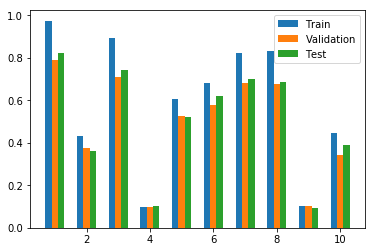

In [8]:
## Plotting the data
xx = np.array(range(1,11))
plt.bar(xx-0.2, train_accuracy, width=0.2)
plt.bar(xx, validation_accuracy, width=0.2)
plt.bar(xx+0.2, test_accuracy, width=0.2)
plt.legend(["Train", "Validation", "Test"])
plt.show()

**Solutions**

**Exercise 1 **

In [ ]:
X_train, X_test, X_validation = np.split(data, [int(.6 * len(data)), int(.8 * len(data))])
Y_train, Y_test, Y_validation = np.split(target, [int(.6 * len(target)), int(.8 * len(target))])

**Exercise 2**

In [ ]:
test_accuracy.append(accuracy(Y_test,predTest))
validation_accuracy.append(accuracy(Y_validation,predVal))